In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [118]:
# Загрузка и подготовка датасета cifar10

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [119]:
train_x.shape

(50000, 32, 32, 3)

In [120]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.


print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


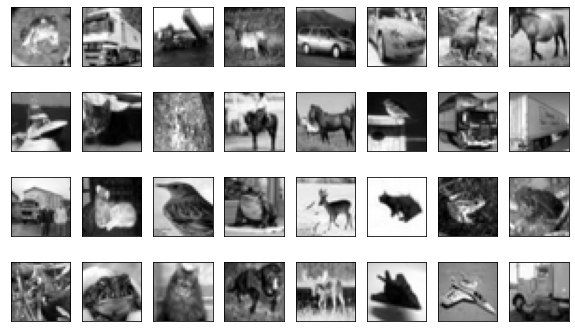

In [121]:
# Визуализация датасета cifar10

some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

In [122]:
# Создание модели CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),    
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [123]:
# подготовка к обучению

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
# Обучение модели

NUM_EPOCHS = 5

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.6813 - accuracy: 0.3736
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9884 - accuracy: 0.6516
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7785 - accuracy: 0.7282
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.6259 - accuracy: 0.7784
Epoch 5/5
1563/1563 [==============================] - 106s 68ms/step - loss: 0.5097 - accuracy: 0.8216


In [125]:
# Оценка качесва модели

model.evaluate(test_x, test_y)

313/313 [==============================] - 5s 15ms/step - loss: 0.8154 - accuracy: 0.7367


[0.8153655529022217, 0.7366999983787537]

In [126]:
# Ответ модели

sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[1.1093890e-03 5.5493732e-05 2.1528227e-03 5.3034014e-01 4.0963473e-04
 4.3603024e-01 2.8985431e-02 3.6759081e-04 3.4868479e-04 2.0053610e-04], shape=(10,), dtype=float32)


In [127]:
def test_digit(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

In [128]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

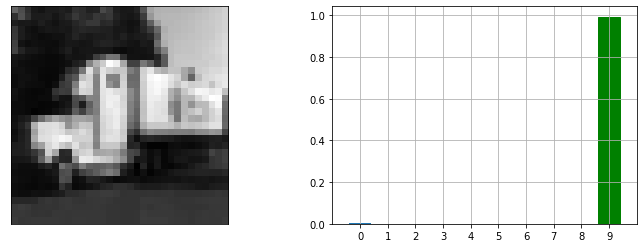

Predicted number: 9
True Answer: [9]
truck


In [129]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

print('True Answer: {}'.format(test_y[idx]))
print(classes[int(test_y[idx])])